Importing the required packages

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np



importing the image and converting to grayscale

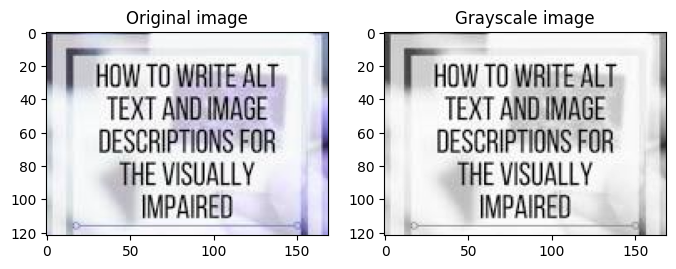

In [26]:
image = cv2.imread("1.jfif")
image1 = cv2.imread("1.jfif")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(1, figsize=(8, 8))
plt.subplot(1, 2, 1), plt.imshow(image1, cmap='gray'), plt.title('Original image')
plt.subplot(1, 2, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale image')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

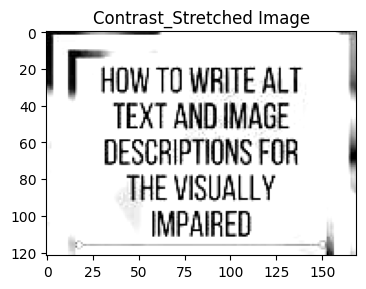

In [27]:
# contrast stretching
def pixelVal(pix, r1, s1, r2, s2):
	if (0 <= pix and pix <= r1):
		return (s1 / r1) * pix
	elif (r1 < pix and pix <= r2):
		return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
	else:
		return ((255 - s2) / (255 - r2)) * (pix - r2) + s2


r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2)
contrast_stretched=contrast_stretched.astype(np.uint8)

plt.figure(1, figsize=(4 ,4))
plt.subplot(1, 1, 1), plt.imshow(contrast_stretched, cmap='gray'), plt.title('Contrast_Stretched Image')
plt.show


Thresholding

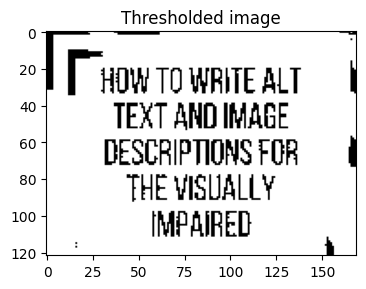

In [28]:
thresh = cv2.threshold(contrast_stretched , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.figure(1, figsize=(4, 4))
plt.subplot(1, 1, 1), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded image')
plt.show()

making sure the texts are white

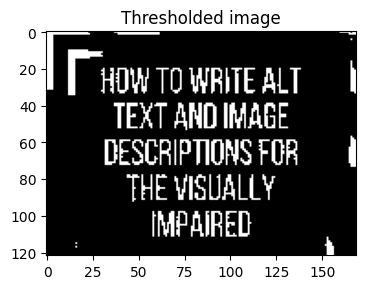

In [29]:
n=0
s= image.shape
for i in range (s[0]):
    for j in range (s[1]):
        if thresh[i,j] == 255:
            n = n+1

if n>s[0]*s[1]*0.7:
    for i in range (s[0]):
        for j in range (s[1]):
            if thresh[i,j] == 0:
                thresh[i,j] = 1
            else:
                thresh[i,j] = 0

plt.figure(1, figsize=(4, 4))
plt.subplot(1, 1, 1), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded image')
plt.show()

Creating the masks

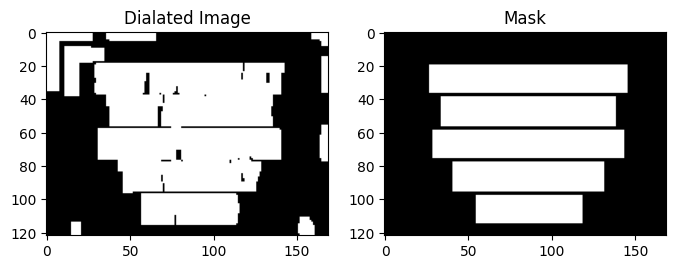

In [33]:
# Apply closing
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, close_kernel, iterations=1)

# Apply dilation 
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,3))
dilate = cv2.dilate(close, dilate_kernel, iterations=1)

# creating white rectangles
mask1 = np.zeros((s[0],s[1]), np.uint8)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 800 and area < 15000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(mask1, (x, y), (x + w, y + h), (255,255,255), -1)


dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
mask0 = cv2.dilate(close, dilate_kernel, iterations=1)


plt.figure(1, figsize=(8, 8))
plt.subplot(1, 2, 1), plt.imshow(mask0, cmap='gray'), plt.title('Dialated Image')
plt.subplot(1, 2, 2), plt.imshow(mask1, cmap='gray'), plt.title('Mask')
plt.show()

inpainting the image

In [34]:
dst1 = cv2.inpaint(image, mask1, 15, cv2.INPAINT_NS)
dst2 = cv2.inpaint(image, mask1, 15, cv2.INPAINT_TELEA)

showing the results

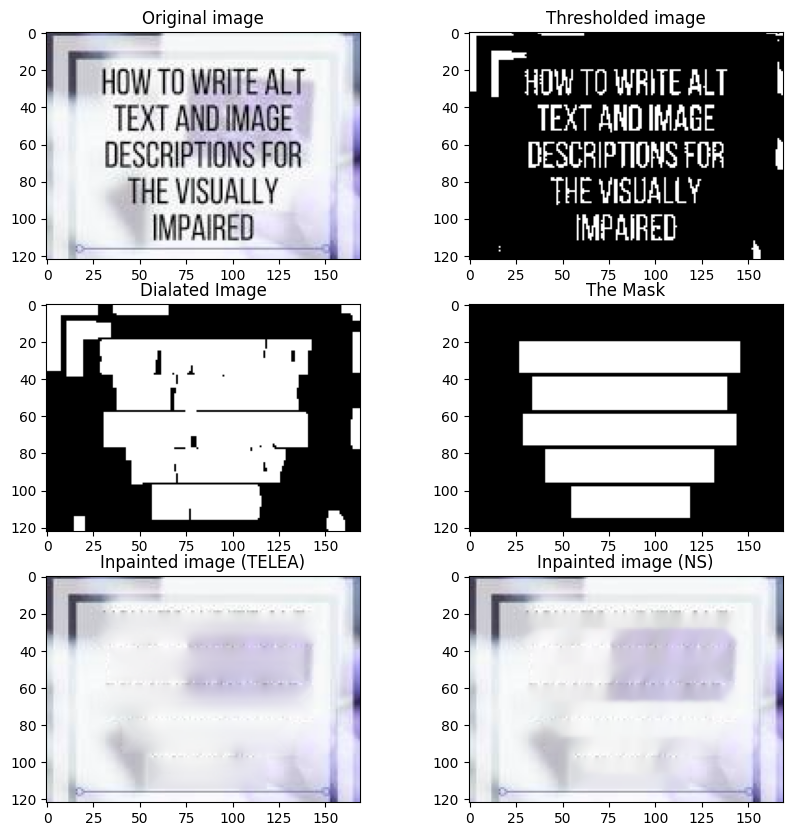

In [35]:
plt.figure(1, figsize=(10, 10))
plt.subplot(3, 2, 1), plt.imshow(image1, cmap='gray'), plt.title('Original image')
plt.subplot(3, 2, 2), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded image')
plt.subplot(3, 2, 3), plt.imshow(mask0, cmap='gray'), plt.title('Dialated Image')
plt.subplot(3, 2, 4), plt.imshow(mask1, cmap='gray'), plt.title('The Mask')
plt.subplot(3, 2, 5), plt.imshow(dst2, cmap='gray'), plt.title('Inpainted image (TELEA)')
plt.subplot(3, 2, 6), plt.imshow(dst1, cmap='gray'), plt.title('Inpainted image (NS)')
plt.show()